In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
dataset = pd.read_csv("dsg-hackathon/TrainingData.csv")

In [6]:
dataset.head()

,rowID,chunkID,position_within_chunk,month_most_common,weekday,hour,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
0,1,1,1,10,Saturday,21,0.01,117.0,187.0,0.3,...,1.748424,NaN,NaN,5.130631,1.341606,2.138792,3.013752,NaN,5.679280,NaN
1,2,1,2,10,Saturday,22,0.01,231.0,202.0,0.5,...,2.144120,NaN,NaN,5.130631,1.195779,2.722099,3.888712,NaN,7.426751,NaN
2,3,1,3,10,Saturday,23,0.01,247.0,227.0,0.5,...,1.932469,NaN,NaN,5.136395,1.409658,3.110970,3.888712,NaN,7.683732,NaN
3,4,1,4,10,Sunday,0,0.01,219.0,218.0,0.2,...,2.088907,NaN,NaN,5.217102,1.477711,2.041574,3.208188,NaN,4.831243,NaN
4,5,1,5,10,Sunday,1,0.01,2.0,216.0,0.2,...,2.604232,NaN,NaN,5.217102,1.458267,2.138792,3.499841,NaN,4.625658,NaN


In [47]:
chunkID = np.unique(dataset.chunkID)

Load data into separate chunks. Each chunk contains 8 days (192 hours) of observations, with each observation recorded on an hourly basis.

In [41]:
chunks = dict()

for chunkID in chunkID:
    selection = dataset[dataset.chunkID==chunkID]
    chunks[chunkID] = selection

In [52]:
chunks[1]

,rowID,chunkID,position_within_chunk,month_most_common,weekday,hour,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
0,1,1,1,10,Saturday,21,0.01,117.0,187.0,0.3,...,1.748424,NaN,NaN,5.130631,1.341606,2.138792,3.013752,NaN,5.679280,NaN
1,2,1,2,10,Saturday,22,0.01,231.0,202.0,0.5,...,2.144120,NaN,NaN,5.130631,1.195779,2.722099,3.888712,NaN,7.426751,NaN
2,3,1,3,10,Saturday,23,0.01,247.0,227.0,0.5,...,1.932469,NaN,NaN,5.136395,1.409658,3.110970,3.888712,NaN,7.683732,NaN
3,4,1,4,10,Sunday,0,0.01,219.0,218.0,0.2,...,2.088907,NaN,NaN,5.217102,1.477711,2.041574,3.208188,NaN,4.831243,NaN
4,5,1,5,10,Sunday,1,0.01,2.0,216.0,0.2,...,2.604232,NaN,NaN,5.217102,1.458267,2.138792,3.499841,NaN,4.625658,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,188,1,188,10,Sunday,16,0.16,286.0,279.0,4.7,...,0.975437,NaN,NaN,1.204834,0.719412,0.972178,0.777742,NaN,0.231283,NaN
188,189,1,189,10,Sunday,17,0.01,286.0,294.0,2.9,...,1.407942,NaN,NaN,1.216363,0.836073,1.166614,0.777742,NaN,0.565358,NaN
189,190,1,190,10,Sunday,18,0.01,249.0,247.0,2.7,...,1.168684,NaN,NaN,2.599904,0.923569,1.458267,0.972178,NaN,1.361999,NaN
190,191,1,191,10,Sunday,19,0.01,237.0,222.0,3.0,...,1.812840,NaN,NaN,2.599904,0.913847,1.458267,1.652703,NaN,1.618980,NaN


<AxesSubplot:>

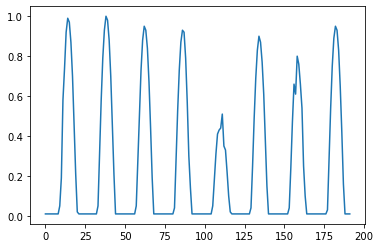

In [54]:
chunks[1]["Solar.radiation_64"].plot()

In [79]:
def to_chunks(values, chunk_ix=1):
    chunks = dict()
    # get the unique chunk ids
    chunk_ids = np.unique(values[:, chunk_ix])
    # group rows by chunk id
    for chunk_id in chunk_ids:
        selection = values[:, chunk_ix] == chunk_id
        chunks[chunk_id] = values[selection, :]
    return chunks

chunks2 = to_chunks(dataset.values)

chunks stays as a DataFrame. Columns can be referenced by name.

to_chunks places the data in arrays. chunks2 data is positionally referenced with no column name

In [80]:
chunks2

{1: array([[1, 1, 1, ..., nan, 5.6792801662921795, nan],
        [2, 1, 2, ..., nan, 7.42675098668978, nan],
        [3, 1, 3, ..., nan, 7.68373198968942, nan],
        ...,
        [190, 1, 190, ..., nan, 1.36199931589812, nan],
        [191, 1, 191, ..., nan, 1.61898031889777, nan],
        [192, 1, 192, ..., nan, 1.87596132189742, nan]], dtype=object),
 2: array([[265, 2, 1, ..., nan, 0.231282902699682, nan],
        [266, 2, 2, ..., nan, 0.38547150449946904, nan],
        [267, 2, 3, ..., nan, 0.488263905699328, nan],
        ...,
        [454, 2, 190, ..., nan, 0.5653582065992221, nan],
        [455, 2, 191, ..., nan, 0.591056306899186, nan],
        [456, 2, 192, ..., nan, 0.5139620059992921, nan]], dtype=object),
 3: array([[529, 3, 1, ..., nan, 0.5653582065992221, nan],
        [530, 3, 2, ..., nan, 0.719546808399009, nan],
        [531, 3, 3, ..., nan, 0.719546808399009, nan],
        ...,
        [718, 3, 190, ..., nan, 0.359773404199505, nan],
        [719, 3, 191, ..., nan,

In [68]:
chunks

{1:      rowID  chunkID  position_within_chunk  month_most_common   weekday  hour  \
 0        1        1                      1                 10  Saturday    21   
 1        2        1                      2                 10  Saturday    22   
 2        3        1                      3                 10  Saturday    23   
 3        4        1                      4                 10    Sunday     0   
 4        5        1                      5                 10    Sunday     1   
 ..     ...      ...                    ...                ...       ...   ...   
 187    188        1                    188                 10    Sunday    16   
 188    189        1                    189                 10    Sunday    17   
 189    190        1                    190                 10    Sunday    18   
 190    191        1                    191                 10    Sunday    19   
 191    192        1                    192                 10    Sunday    20   
 
      Solar

In [81]:
type(chunks2[1])

numpy.ndarray

In [82]:
type(chunks[1])

pandas.core.frame.DataFrame

In [131]:
def split_train_test(chunks):
    '''
    chunks is a dictionary of dataframes
    '''
    
    test, train = pd.DataFrame(), pd.DataFrame()
    
    # first 5 days as training data
    cutoff = 5*24
    
    for chunk in chunks:
        train_data = chunk[chunk.position_within_chunk<cutoff]
        test_data = chunk[chunk.position_within_chunk>cutoff]
        if len(train_data) == 0 or len(test_data) == 0:
            print("dropping chunk=%d: training data=%d   test data=%d" (chunk, len(train_data), len(test_data)))
            continue
        #select subset of data relevant for model
        indices = [1,2,5] + [x for x in range(56,train_data.shape[1])]
        train.append(train_data.iloc[:,indices])
        test.append(test_data.iloc[:,indices])
        
    return train,test
        

In [ ]:
def forecast(test)

In [100]:
temp = chunks[1][chunks[1].position_within_chunk<120]

In [128]:
indices = [1,2,5] + [x for x in range(56,temp.shape[1])]

In [130]:
temp.iloc[:,indices]

,chunkID,position_within_chunk,hour,target_1_57,target_10_4002,target_10_8003,target_11_1,target_11_32,target_11_50,target_11_64,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
0,1,1,21,2.679233,6.181623,NaN,0.114975,0.114975,0.114975,0.114975,...,1.748424,NaN,NaN,5.130631,1.341606,2.138792,3.013752,NaN,5.679280,NaN
1,1,2,22,2.679233,8.475833,NaN,0.114975,0.114975,0.114975,0.114975,...,2.144120,NaN,NaN,5.130631,1.195779,2.722099,3.888712,NaN,7.426751,NaN
2,1,3,23,2.679233,8.921930,NaN,0.114975,0.114975,0.114975,0.114975,...,1.932469,NaN,NaN,5.136395,1.409658,3.110970,3.888712,NaN,7.683732,NaN
3,1,4,0,2.679233,5.098246,NaN,0.114975,0.114975,0.114975,0.114975,...,2.088907,NaN,NaN,5.217102,1.477711,2.041574,3.208188,NaN,4.831243,NaN
4,1,5,1,2.679233,4.875197,NaN,0.114975,0.114975,0.114975,0.114975,...,2.604232,NaN,NaN,5.217102,1.458267,2.138792,3.499841,NaN,4.625658,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,1,115,15,3.797338,0.127456,NaN,1.437190,1.954578,1.954578,0.804826,...,3.533658,NaN,NaN,4.121799,10.382862,0.874960,2.041574,NaN,0.950830,NaN
115,1,116,16,3.797338,0.223048,NaN,0.919801,1.839603,1.667140,0.977289,...,3.101153,NaN,NaN,4.116034,11.111996,0.972178,2.236010,NaN,1.336301,NaN
116,1,117,17,3.818434,1.688794,NaN,0.114975,2.184528,0.287438,0.804826,...,3.202377,NaN,NaN,4.133328,10.635628,1.555485,2.722099,NaN,2.903885,NaN
117,1,118,18,5.548333,2.708443,NaN,0.114975,2.012065,0.114975,0.632363,...,3.846534,NaN,NaN,5.315103,10.791177,1.847138,3.402623,NaN,3.700526,NaN


In [127]:
temp.iloc[:,0:temp.shape[1]]

,rowID,chunkID,position_within_chunk,month_most_common,weekday,hour,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
0,1,1,1,10,Saturday,21,0.01,117.0,187.0,0.3,...,1.748424,NaN,NaN,5.130631,1.341606,2.138792,3.013752,NaN,5.679280,NaN
1,2,1,2,10,Saturday,22,0.01,231.0,202.0,0.5,...,2.144120,NaN,NaN,5.130631,1.195779,2.722099,3.888712,NaN,7.426751,NaN
2,3,1,3,10,Saturday,23,0.01,247.0,227.0,0.5,...,1.932469,NaN,NaN,5.136395,1.409658,3.110970,3.888712,NaN,7.683732,NaN
3,4,1,4,10,Sunday,0,0.01,219.0,218.0,0.2,...,2.088907,NaN,NaN,5.217102,1.477711,2.041574,3.208188,NaN,4.831243,NaN
4,5,1,5,10,Sunday,1,0.01,2.0,216.0,0.2,...,2.604232,NaN,NaN,5.217102,1.458267,2.138792,3.499841,NaN,4.625658,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,115,1,115,10,Thursday,15,0.22,142.0,144.0,3.8,...,3.533658,NaN,NaN,4.121799,10.382862,0.874960,2.041574,NaN,0.950830,NaN
115,116,1,116,10,Thursday,16,0.10,123.0,138.0,3.4,...,3.101153,NaN,NaN,4.116034,11.111996,0.972178,2.236010,NaN,1.336301,NaN
116,117,1,117,10,Thursday,17,0.02,124.0,122.0,2.7,...,3.202377,NaN,NaN,4.133328,10.635628,1.555485,2.722099,NaN,2.903885,NaN
117,118,1,118,10,Thursday,18,0.01,133.0,128.0,2.9,...,3.846534,NaN,NaN,5.315103,10.791177,1.847138,3.402623,NaN,3.700526,NaN


In [126]:
temp.iloc[:,[5,temp.shape[1]-1]]

,hour,target_9_8003
0,21,NaN
1,22,NaN
2,23,NaN
3,0,NaN
4,1,NaN
...,...,...
114,15,NaN
115,16,NaN
116,17,NaN
117,18,NaN


In [116]:
temp

,rowID,chunkID,position_within_chunk,month_most_common,weekday,hour,Solar.radiation_64,WindDirection..Resultant_1,WindDirection..Resultant_1018,WindSpeed..Resultant_1,...,target_4_6006,target_4_8003,target_5_6006,target_7_57,target_8_57,target_8_4002,target_8_6004,target_8_8003,target_9_4002,target_9_8003
0,1,1,1,10,Saturday,21,0.01,117.0,187.0,0.3,...,1.748424,NaN,NaN,5.130631,1.341606,2.138792,3.013752,NaN,5.679280,NaN
1,2,1,2,10,Saturday,22,0.01,231.0,202.0,0.5,...,2.144120,NaN,NaN,5.130631,1.195779,2.722099,3.888712,NaN,7.426751,NaN
2,3,1,3,10,Saturday,23,0.01,247.0,227.0,0.5,...,1.932469,NaN,NaN,5.136395,1.409658,3.110970,3.888712,NaN,7.683732,NaN
3,4,1,4,10,Sunday,0,0.01,219.0,218.0,0.2,...,2.088907,NaN,NaN,5.217102,1.477711,2.041574,3.208188,NaN,4.831243,NaN
4,5,1,5,10,Sunday,1,0.01,2.0,216.0,0.2,...,2.604232,NaN,NaN,5.217102,1.458267,2.138792,3.499841,NaN,4.625658,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,115,1,115,10,Thursday,15,0.22,142.0,144.0,3.8,...,3.533658,NaN,NaN,4.121799,10.382862,0.874960,2.041574,NaN,0.950830,NaN
115,116,1,116,10,Thursday,16,0.10,123.0,138.0,3.4,...,3.101153,NaN,NaN,4.116034,11.111996,0.972178,2.236010,NaN,1.336301,NaN
116,117,1,117,10,Thursday,17,0.02,124.0,122.0,2.7,...,3.202377,NaN,NaN,4.133328,10.635628,1.555485,2.722099,NaN,2.903885,NaN
117,118,1,118,10,Thursday,18,0.01,133.0,128.0,2.9,...,3.846534,NaN,NaN,5.315103,10.791177,1.847138,3.402623,NaN,3.700526,NaN


In [124]:
temp.shape[1]

95